In [1]:
import generator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# No outliers, no drift

In [3]:
data = [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(24*7)]

In [4]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

In [5]:
df

,x,ds,y
0,0,2022-06-23 15:33:10.591047,208.278887
1,1,2022-06-23 16:33:10.591047,232.661695
2,2,2022-06-23 17:33:10.591047,251.065984
3,3,2022-06-23 18:33:10.591047,277.419623
4,4,2022-06-23 19:33:10.591047,302.261368
...,...,...,...
163,163,2022-06-30 10:33:10.591047,121.465019
164,164,2022-06-30 11:33:10.591047,115.786008
165,165,2022-06-30 12:33:10.591047,133.344628
166,166,2022-06-30 13:33:10.591047,169.478247


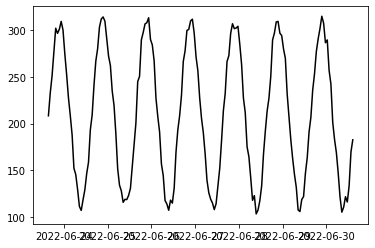

In [6]:
plt.plot(df.ds, df.y, c="k")
plt.show()

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from alibi_detect.cd import MMDDrift

In [61]:
pred_array = df[['y']].to_numpy()
pred_array

array([[208.27888693],
       [232.66169483],
       [251.06598374],
       [277.41962263],
       [302.26136761],
       [296.72459177],
       [301.19163478],
       [309.57232075],
       [300.35042792],
       [274.72679299],
       [252.43174039],
       [227.48029035],
       [208.53767135],
       [187.86686288],
       [151.95938299],
       [145.28958772],
       [129.39605968],
       [111.04855612],
       [106.75708203],
       [118.23747546],
       [128.98746698],
       [146.22908643],
       [158.51842986],
       [193.28658353],
       [209.18565831],
       [240.91471273],
       [266.92768593],
       [280.30087475],
       [303.39983345],
       [312.16143623],
       [314.37216277],
       [309.77817883],
       [290.45116279],
       [272.29379045],
       [262.39235486],
       [234.96162366],
       [219.48996418],
       [189.2554098 ],
       [151.49088569],
       [133.89264446],
       [127.77455535],
       [115.45075152],
       [118.63176425],
       [118

In [62]:
ert = 150
window_sizes = 24
cd = MMDDrift(df[['y']].to_numpy())

In [63]:
drifts = []
thresh = []
stats = []
preds = cd.predict(df[['y']].to_numpy())
preds


{'data': {'is_drift': 0,
  'distance': -0.0066246986,
  'p_val': 1.0,
  'threshold': 0.05,
  'distance_threshold': 0.0139580965},
 'meta': {'name': 'MMDDriftTF',
  'detector_type': 'offline',
  'data_type': None,
  'version': '0.9.1',
  'backend': 'tensorflow'}}

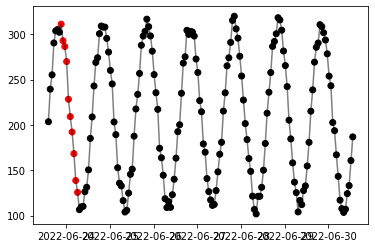

In [65]:
df['is_drift'] = drifts
df['colour'] = df['is_drift'].apply(lambda x: "k" if x==0 else "r")
df['threshold'] = thresh
df['stat'] = stats

plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Trend drift

In [64]:
N = 100

test_df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1h'),
    'y': [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(N)] + np.linspace(start=0, stop=100, num=N)
})
test_df.head()

,x,ds,y
0,0,2022-06-23 15:58:29.239057,211.004052
1,1,2022-06-23 16:58:29.239057,233.306481
2,2,2022-06-23 17:58:29.239057,271.258879
3,3,2022-06-23 18:58:29.239057,279.884084
4,4,2022-06-23 19:58:29.239057,310.258385


In [65]:
drifts = [0]*2
thresh = [0]*2

pred_array = test_df[['y']].to_numpy()
for i in range(2, N):
    preds = cd.predict(pred_array[i-2:i])
    data = preds["data"]
    drifts.append(data['is_drift'])
    thresh.append(data['threshold'])
    # stats.append(data['test_stat'])

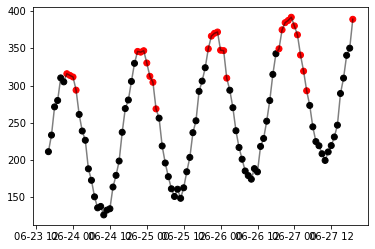

In [66]:
test_df['is_drift'] = drifts
test_df['colour'] = test_df['is_drift'].apply(lambda x: "k" if x==0 else "r")
test_df['threshold'] = thresh
# test_df['stat'] = stats

plt.plot(test_df.ds, test_df.y, alpha=0.5, c='k')
plt.scatter(test_df.ds, test_df.y, c=test_df.colour, label=test_df.colour)
plt.show()

# Saving

In [67]:
from alibi_detect.utils.saving import save_detector

save_detector(detector=cd, filepath="./model")